In [ ]:
import math
from random import randint, uniform, random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')


# Set the radius of the galactic disc (scaling factor):
SCALE = 350  # Use range of 200 - 700.

In [ ]:
def build_spiral_stars(b, r, rot_fac, fuz_fac):
    """Return list of (x,y,z) points for a logarithmic spiral.

    b = constant for spiral direction and "openness"
    r = scale factor (galactic disc radius)
    rot_fac = factor to rotate each spiral arm
    fuz_fac = randomly shift star position; applied to 'fuzz' variable
    """
    fuzz = int(0.030 * abs(r))  # Scalable initial amount to shift locations.
    num_stars = 1000
    spiral_stars = []
    for i in range(0, num_stars):
        theta = math.radians(i)
        x = r * math.exp(b*theta) * math.cos(theta - math.pi * rot_fac)  - randint(-fuzz, fuzz) * fuz_fac
        y = r * math.exp(b*theta) * math.sin(theta - math.pi * rot_fac) - randint(-fuzz, fuzz) * fuz_fac
        z = uniform((-SCALE / (SCALE * 3)), (SCALE / (SCALE * 3)))
        spiral_stars.append((x, y, z))
    return spiral_stars


In [ ]:
# Assign scale factor, rotation factor, and fuzz factor for spiral arms.
# Each arm is a pair: leading arm + trailing arm:
arms_info = [(SCALE, 1, 1.5), (SCALE, 0.91, 1.5),
             (-SCALE, 1, 1.5), (-SCALE, -1.09, 1.5),
             (-SCALE, 0.5, 1.5), (-SCALE, 0.4, 1.5),
             (-SCALE, -0.5, 1.5), (-SCALE, -0.6, 1.5)]

In [ ]:
def build_spiral_arms(b, arms_info):
    """Return lists of point coordinates for galactic spiral arms.

    b = constant for spiral direction and "openness"
    arms_info = list of scale, rotation, and fuzz factors
    """
    leading_arms = []
    trailing_arms = []
    for i, arm_info in enumerate(arms_info):
        arm = build_spiral_stars(b=b,
                                 r=arm_info[0],
                                 rot_fac=arm_info[1],
                                 fuz_fac=arm_info[2])
        if i % 2 != 0:
            leading_arms.extend(arm)
        else:
            trailing_arms.extend(arm)
    return leading_arms, trailing_arms

In [ ]:
def spherical_coords(num_pts, radius):
    """Return list of uniformly distributed points in a sphere."""
    position_list = []
    for _ in range(num_pts):
        coords = np.random.normal(0, 1, 3)
        coords *= radius
        coords[2] *= 0.02  # Reduce z range for matplotlib default z-scale.
        position_list.append(list(coords))
    return position_list

In [ ]:
def build_core_stars(scale_factor):
    """Return lists of point coordinates for galactic core stars."""
    core_radius = scale_factor / 15
    num_rim_stars = 3000
    outer_stars = spherical_coords(num_rim_stars, core_radius)
    inner_stars = spherical_coords(int(num_rim_stars/4), core_radius/2.5)
    return (outer_stars + inner_stars)

In [ ]:
def haze(scale_factor, r_mult, z_mult, density):
    """Generate uniform random (x,y,z) points within a disc for 2-D display.

    scale_factor = galactic disc radius
    r_mult = scalar for radius of disc
    z_mult = scalar for z values
    density = multiplier to vary the number of stars posted
    """
    haze_coords = []
    for _ in range(0, scale_factor * density):
        n = random()
        theta = uniform(0, 2 * math.pi)
        x = round(math.sqrt(n) * math.cos(theta) * scale_factor) / r_mult
        y = round(math.sqrt(n) * math.sin(theta) * scale_factor) / r_mult
        z = np.random.uniform(-1, 1) * z_mult
        haze_coords.append((x, y, z))
    return haze_coords

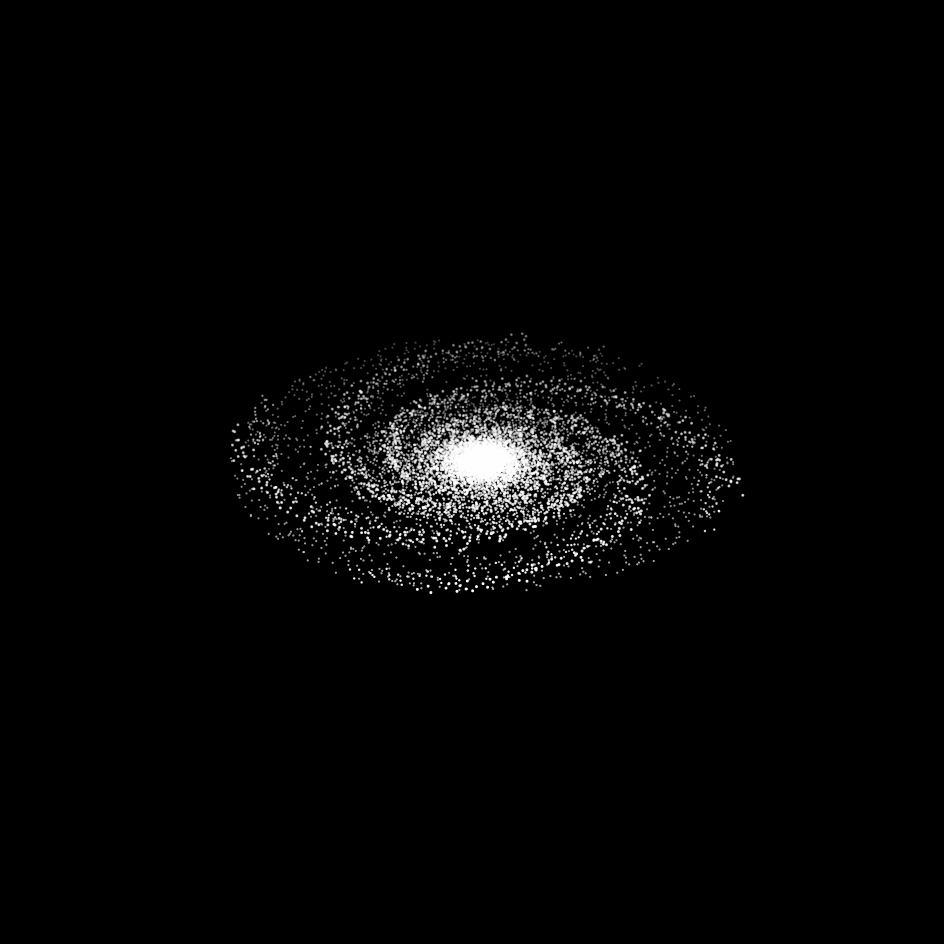

In [ ]:
# Create lists of star positions for galaxy:
leading_arm, trailing_arm = build_spiral_arms(b=-0.3, arms_info=arms_info)
core_stars = build_core_stars(SCALE)
inner_haze_stars = haze(SCALE, r_mult=2, z_mult=0.5, density=5)
outer_haze_stars = haze(SCALE, r_mult=1, z_mult=0.3, density=5)

# Plot stars in 3D using matplotlib:
fig, ax = plt.subplots(1, 1,
                       subplot_kw={'projection': '3d'},
                       figsize=(12, 12))
ax.set_axis_off()
ax.set_zlim (-15, 15)

ax.scatter(*zip(*leading_arm), c='w', marker='.', s=5)
ax.scatter(*zip(*trailing_arm), c='w', marker='.', s=2)
ax.scatter(*zip(*core_stars), c='w', marker='.', s=1)
ax.scatter(*zip(*inner_haze_stars), c='w', marker='.', s=1)
ax.scatter(*zip(*outer_haze_stars), c='lightgrey', marker='.', s=1)